Similarity maps are a way to visualize the atomic contributions to the similarity between a molecule and 
a reference molecule. The methodology is described in Ref. 
Riniker, S.; Landrum, G. A. “Similarity Maps - A Visualization Strategy for Molecular Fingerprints and 
Machine-Learning Methods” J. Cheminf. 5:43 (2013).

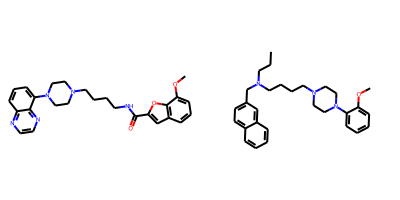

In [5]:
from rdkit import Chem
from rdkit.Chem import Draw

mol = Chem.MolFromSmiles('COc1cccc2cc(C(=O)NCCCCN3CCN(c4cccc5nccnc54)CC3)oc21')
refmol = Chem.MolFromSmiles('CCCN(CCCCN1CCN(c2ccccc2OC)CC1)Cc1ccc2ccccc2c1')
mol_list = [mol, refmol]
img = Draw.MolsToGridImage(mol_list, molsPerRow=2)
img

The SimilarityMaps module supports three kind of fingerprints: atom pairs, topological torsions and Morgan fingerprints.

In [13]:
from rdkit.Chem.Draw import SimilarityMaps

# Use either of these
fp = SimilarityMaps.GetAPFingerprint(mol, fpType='normal')
fp = SimilarityMaps.GetTTFingerprint(mol, fpType='normal')
fp = SimilarityMaps.GetMorganFingerprint(mol, fpType='bv')

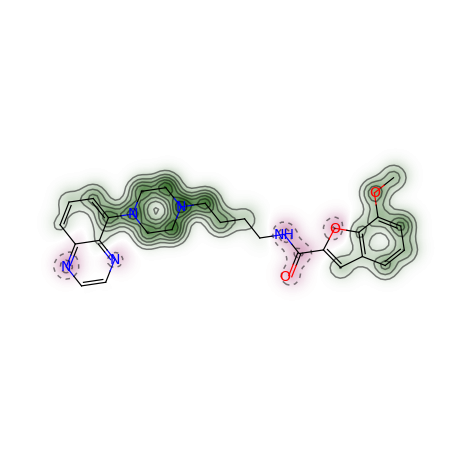

In [12]:
fig, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(refmol, mol, SimilarityMaps.GetMorganFingerprint)

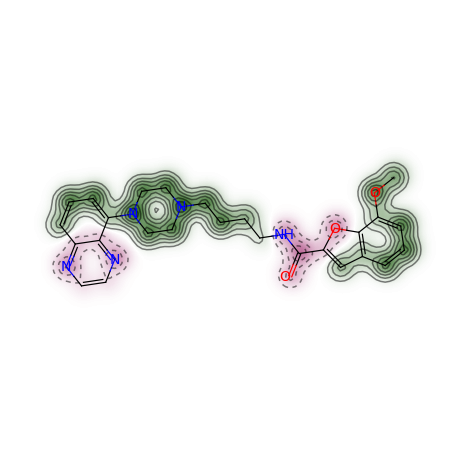

In [8]:
from rdkit import DataStructs
fig, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(refmol, mol, lambda m,idx: SimilarityMaps.GetMorganFingerprint(m, atomId=idx, radius=1, fpType='count'), metric=DataStructs.TanimotoSimilarity)

A variety of descriptors are available within the RDKit. 
See https://www.rdkit.org/docs/GettingStartedInPython.html#list-of-available-descriptors for full list

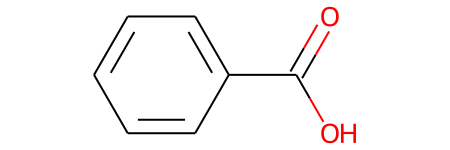

In [20]:
from rdkit.Chem import Descriptors

m = Chem.MolFromSmiles('c1ccccc1C(=O)O')
m

In [22]:
print(Descriptors.TPSA(m)) # Topological polar surface area
print(Descriptors.MolLogP(m))

37.3
1.3848


In [23]:
from rdkit.Chem import AllChem

AllChem.ComputeGasteigerCharges(m)
m.GetAtomWithIdx(0).GetDoubleProp('_GasteigerCharge')

-0.04769375004654255

Similarity maps can be used to visualize descriptors that can be divided into atomic contributions.
The Gasteiger partial charges can be visualized as (using a different color scheme):

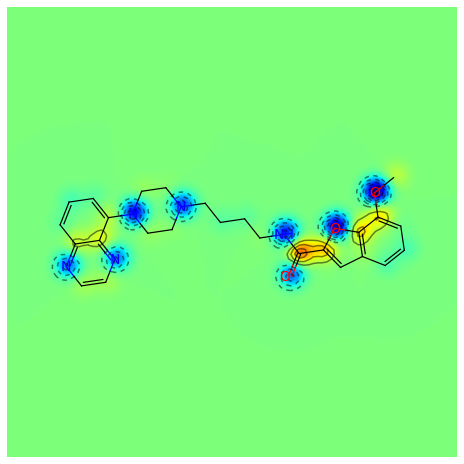

In [28]:
from rdkit.Chem.Draw import SimilarityMaps
mol = Chem.MolFromSmiles('COc1cccc2cc(C(=O)NCCCCN3CCN(c4cccc5nccnc54)CC3)oc21')
AllChem.ComputeGasteigerCharges(mol)
contribs = [mol.GetAtomWithIdx(i).GetDoubleProp('_GasteigerCharge') for i in range(mol.GetNumAtoms())]
fig = SimilarityMaps.GetSimilarityMapFromWeights(mol, contribs, colorMap='jet', contourLines=10)

Or for the Crippen contributions to logP:

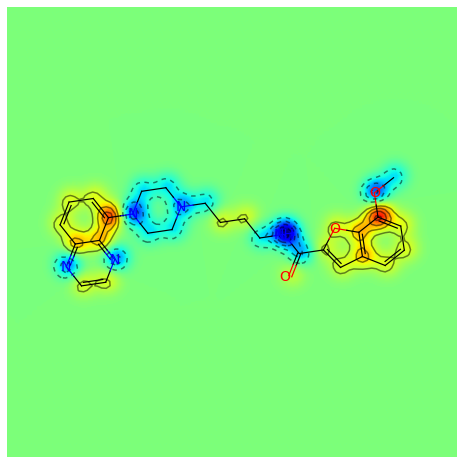

In [25]:
from rdkit.Chem import rdMolDescriptors
contribs = rdMolDescriptors._CalcCrippenContribs(mol)
fig = SimilarityMaps.GetSimilarityMapFromWeights(mol,[x for x,y in contribs], colorMap='jet', contourLines=10)